<a href="https://colab.research.google.com/github/BintangPray/MPDW_Peramalann/blob/main/GARCH%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 15.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Impor Data

In [5]:
data = pd.read_excel("MPDW.xlsx")
lambda_bc = -0.7575758
data['Boxcox'] = data['Harga']**lambda_bc
data['Diff'] = np.diff(data['Boxcox'], prepend=data['Boxcox'][0])

     Tanggal  Harga    Boxcox      Diff
0 2022-09-01  62070  0.000234  0.000000
1 2022-09-02  57760  0.000247  0.000013
2 2022-09-03  59920  0.000240 -0.000007
3 2022-09-04  59450  0.000242  0.000001
4 2022-09-05  61310  0.000236 -0.000006


In [6]:
data['DiffA'] = data['Diff']*(10**7)
print(data.head())
print(data.shape)

     Tanggal  Harga    Boxcox      Diff       DiffA
0 2022-09-01  62070  0.000234  0.000000    0.000000
1 2022-09-02  57760  0.000247  0.000013  131.061941
2 2022-09-03  59920  0.000240 -0.000007  -67.754291
3 2022-09-04  59450  0.000242  0.000001   14.374220
4 2022-09-05  61310  0.000236 -0.000006  -55.749406
(700, 5)


In [7]:
print(data.tail())

       Tanggal  Harga    Boxcox      Diff       DiffA
695 2024-07-27  75460  0.000202  0.000013  126.770576
696 2024-07-28  69540  0.000215  0.000013  128.801400
697 2024-07-29  79400  0.000194 -0.000021 -205.100756
698 2024-07-30  84850  0.000185 -0.000010  -95.201993
699 2024-07-31  78630  0.000196  0.000011  109.584327


# Splitting Data

_Splitting_ data dilakukan dengan membagi data menjadi data latih sebanyak 578 amatan dan data uji sebanyak 122 amatan.

Jumlah data latih: 578
Jumlah data uji: 122


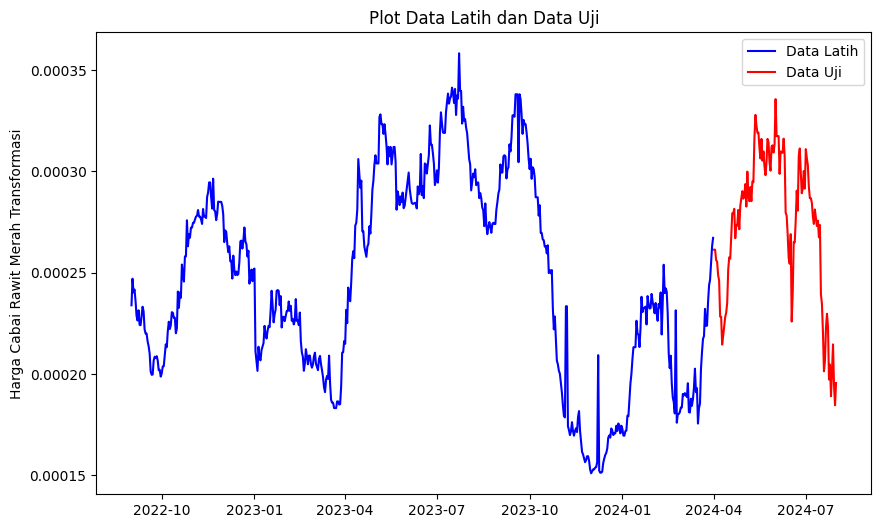

In [8]:
test_size = 122
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Boxcox'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Boxcox'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Harga Cabai Rawit Merah Transformasi')
plt.legend()
plt.show()

Jumlah data latih: 578
Jumlah data uji: 122


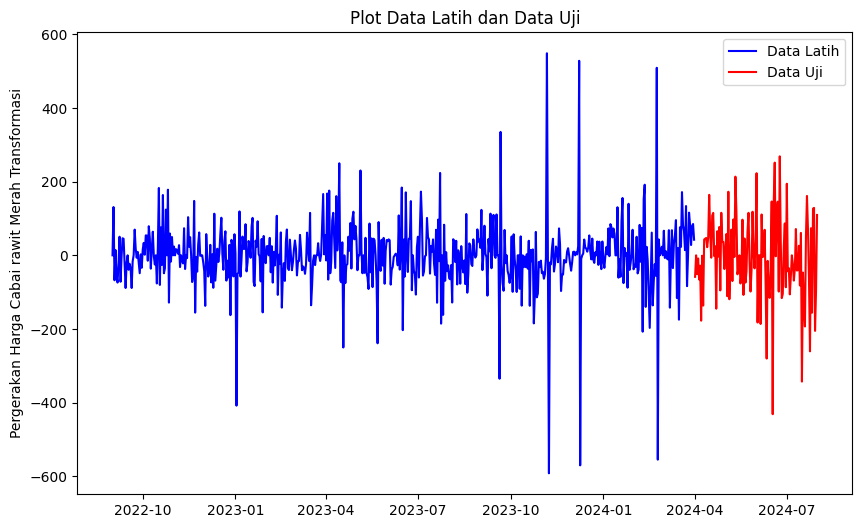

In [9]:
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['DiffA'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['DiffA'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Pergerakan Harga Cabai rawit Merah Transformasi')
plt.legend()
plt.show()

In [10]:
data_diff = data['Diff'][1:]
train_data_diff = data_diff.iloc[:-test_size]
test_data_diff = data_diff.iloc[-test_size:]

print(train_data_diff.head())
print(train_data_diff.shape)

print(test_data_diff.head())
print(test_data_diff.shape)

1    0.000013
2   -0.000007
3    0.000001
4   -0.000006
5   -0.000007
Name: Diff, dtype: float64
(577,)
578   -5.833265e-06
579    0.000000e+00
580   -5.123694e-06
581   -8.430920e-07
582   -6.553211e-06
Name: Diff, dtype: float64
(122,)


# Pemodelan GARCH

### Pendugaan Parameter

GARCH(1,1)

In [11]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 1) model
model_garch11_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=1, q=1)

# Fit the model
result_garch11_diff = model_garch11_diff.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -5911.669969693551
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -5911.669969849328
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-11. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+05 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [12]:
# Display model fitting summary
print(result_garch11_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5911.67
Distribution:                  Normal   AIC:                          -11815.3
Method:            Maximum Likelihood   BIC:                          -11797.9
                                        No. Observations:                  577
Date:                Sat, Nov 02 2024   Df Residuals:                      576
Time:                        06:15:08   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.7637e-08  2.372e-07      0.243      0.808 

GARCH(1,2)

In [13]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(1, 2) model
model_garch12_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=1, q=2)

# Fit the model
result_garch12_diff = model_garch12_diff.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -5908.41539084249
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -5908.4153912213305
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-11. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+05 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [14]:
# Display model fitting summary
print(result_garch12_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5908.42
Distribution:                  Normal   AIC:                          -11806.8
Method:            Maximum Likelihood   BIC:                          -11785.0
                                        No. Observations:                  577
Date:                Sat, Nov 02 2024   Df Residuals:                      576
Time:                        06:15:21   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.7637e-08  2.396e-07      0.241      0.810 

GARCH(2,1)

In [15]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(2, 1) model
model_garch21_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=2, q=1)

# Fit the model
result_garch21_diff = model_garch21_diff.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -5909.245343027425
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -5909.245343385142
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-11. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+05 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [16]:
# Display model fitting summary
print(result_garch21_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5909.25
Distribution:                  Normal   AIC:                          -11808.5
Method:            Maximum Likelihood   BIC:                          -11786.7
                                        No. Observations:                  577
Date:                Sat, Nov 02 2024   Df Residuals:                      576
Time:                        06:15:31   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.7637e-08  2.331e-07      0.247      0.805 

GARCH(2,2)

In [17]:
# Load your time series data (e.g., 'train_data_partial')
# Specify the GARCH(2, 2) model
model_garch22_diff = arch_model(train_data_diff, vol='GARCH', mean = 'constant', p=2, q=2)

# Fit the model
result_garch22_diff = model_garch22_diff.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: -5908.6459864836415
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -5908.645986943751
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-11. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+05 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [18]:
# Display model fitting summary
print(result_garch22_diff.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   Diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5908.65
Distribution:                  Normal   AIC:                          -11805.3
Method:            Maximum Likelihood   BIC:                          -11779.1
                                        No. Observations:                  577
Date:                Sat, Nov 02 2024   Df Residuals:                      576
Time:                        06:15:42   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.7637e-08  2.315e-07      0.249      0.803 

Model GARCH(1,1) dipilih sebagai model tentatif terbaik karena memiliki parameter alpha dan beta yang signifikan

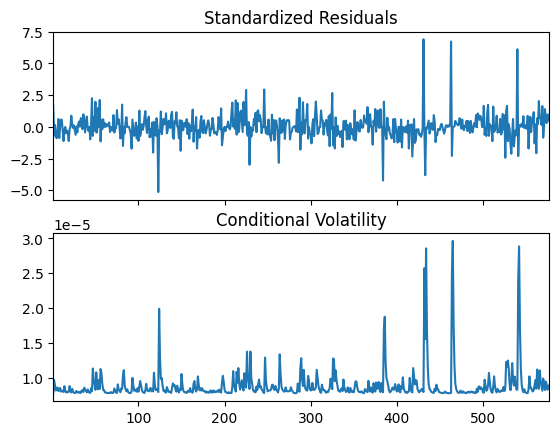

In [19]:
fig = result_garch11_diff.plot()

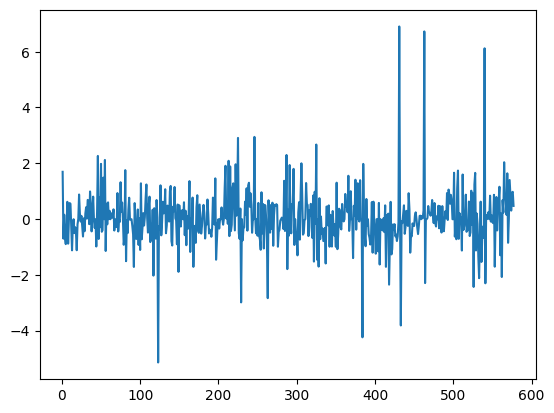

In [20]:
garch_stresidual = result_garch11_diff.resid / result_garch11_diff.conditional_volatility
plt.plot(garch_stresidual)

### Diagnostik Sisaan: Uji Kebebasan Sisaan (Ljung-Box)

$H_0$: Sisaan saling bebas

$H_1$: Sisaan tidak saling bebas

In [21]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), lags=[10], return_df=True)
print(result_df)

     lb_stat  lb_pvalue
10  4.808991   0.903567


### Diagnostik Sisaan: Uji Normalitas Sisaan (Kolmogorov-Smirnov)

$H_0$: Sisaan menyebar normal

$H_1$: Sisaan tidak menyebar normal

In [22]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

9.215813959224458e-06


### Diagnostik Sisaan: Uji Nilai Harapan Sisaan (t-test)

$H_0$: Nilai harapan sisaan nol

$H_1$: Nilai harapan sisaan tidak nol

In [23]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.5283787692218844


In [27]:
from google.colab import files

garch_stresidual.to_excel("garch_stresidual_inifix.xlsx", index=False)
files.download("garch_stresidual_inifix.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediksi

Pendugaan nilai amatan menggunakan model GARCH(1,1) dilakukan pada data latih dan uji untuk menghitung nilai keakuratan model.

In [28]:
np.random.seed(42)
epsilon_train = np.random.normal(0, 1, 577)

### Prediksi pada Data Latih

In [29]:
predicted_train = result_garch11_diff.conditional_volatility * epsilon_train + 5.7637e-08
predicted_train

,cond_vol
1,0.000004
2,-0.000001
3,0.000006
4,0.000012
5,-0.000002
...,...
573,0.000003
574,-0.000002
575,0.000007
576,-0.000019


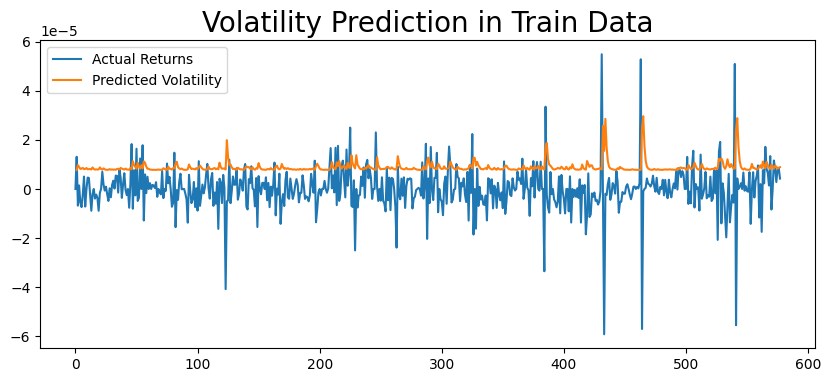

In [30]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(result_garch11_diff.conditional_volatility)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

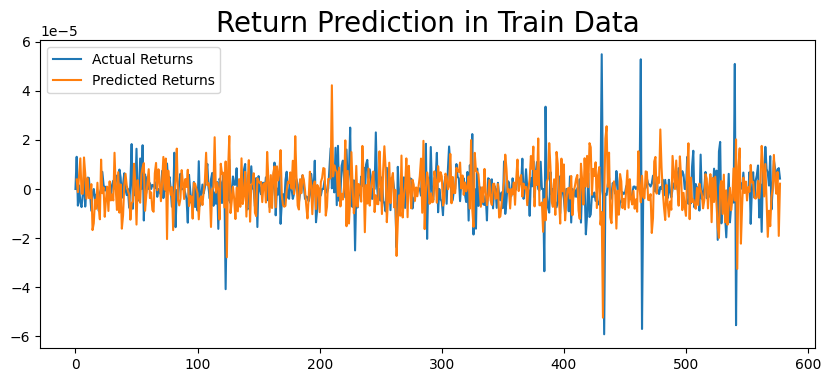

In [31]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['Diff'])
preds, = plt.plot(predicted_train)
plt.title('Return Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [ ]:
from google.colab import files

predicted_train.to_excel("predicted_train_inifix.xlsx", index=False)
files.download("predicted_train_inifix.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Prediksi pada Data Uji

In [32]:
condvar_test = []

for i in range(test_size):
    train = data_diff[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.441e-11. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+05 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.433e-11. Parameter
estimation work better when this value is between 1 and 1000. The recom

In [33]:
condvar_test

[8.330688230342916e-06,
 8.360036573554902e-06,
 7.938902061063015e-06,
 8.139735338805803e-06,
 7.87200094257334e-06,
 8.316375764710612e-06,
 8.010774931851891e-06,
 1.1147143430620688e-05,
 8.901857018847777e-06,
 1.014585316483855e-05,
 8.753848214938428e-06,
 8.307777811605758e-06,
 8.189511606774796e-06,
 7.932131983367448e-06,
 8.073599238055895e-06,
 1.0735241462941982e-05,
 9.159865969812492e-06,
 8.190396277603955e-06,
 9.223099467283752e-06,
 9.675796742278904e-06,
 8.361712740635517e-06,
 7.992008489788978e-06,
 1.0166969483448184e-05,
 9.014524382645085e-06,
 8.133976226776771e-06,
 8.555784831613246e-06,
 9.061943005537198e-06,
 9.631882996340386e-06,
 8.490465696394982e-06,
 8.110170395865727e-06,
 8.014390571958921e-06,
 7.82077554851974e-06,
 8.142046240121383e-06,
 9.301421038059373e-06,
 1.125267245956761e-05,
 1.042430477939347e-05,
 8.705585683486893e-06,
 8.5966861955142e-06,
 8.591290148609162e-06,
 9.07804094148949e-06,
 8.146014258855875e-06,
 1.232927357979541

In [34]:
condvar_test = pd.Series(condvar_test, index=data_diff.index[-122:])
print(condvar_test)

578    0.000008
579    0.000008
580    0.000008
581    0.000008
582    0.000008
         ...   
695    0.000011
696    0.000011
697    0.000011
698    0.000013
699    0.000011
Length: 122, dtype: float64


In [35]:
np.random.seed(42)
epsilon_test = np.random.normal(0, 1, 122)

In [36]:
predicted_test = condvar_test * epsilon_test + 5.7637e-08
predicted_test

,0
578,0.000004
579,-0.000001
580,0.000005
581,0.000012
582,-0.000002
...,...
695,-0.000013
696,0.000012
697,0.000008
698,0.000010


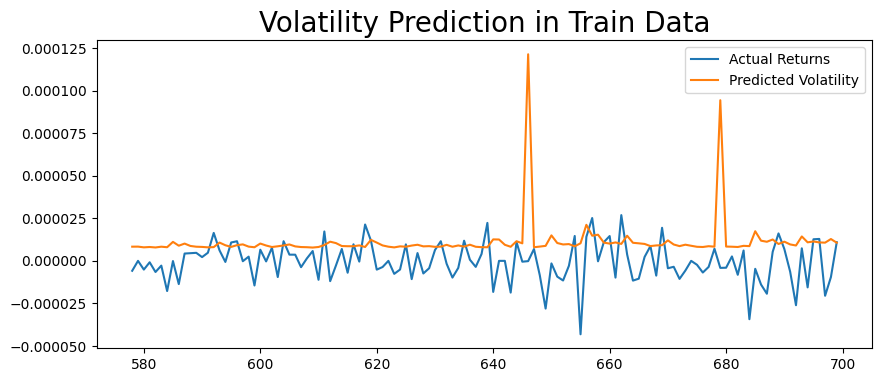

In [37]:
plt.figure(figsize=(10,4))
true, = plt.plot(test_data['Diff'])
preds, = plt.plot(condvar_test)
plt.title('Volatility Prediction in Train Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Volatility'], fontsize=10)

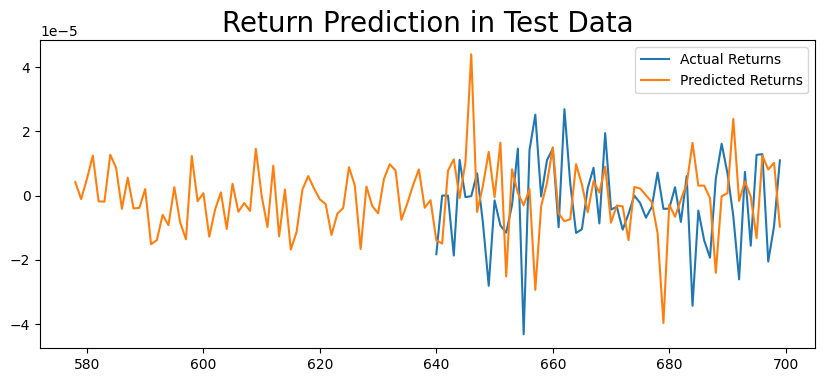

In [38]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_diff[-60:])
preds, = plt.plot(predicted_test)
plt.title('Return Prediction in Test Data', fontsize=20)
plt.legend(['Actual Returns', 'Predicted Returns'], fontsize=10)

In [39]:
from google.colab import files

predicted_test.to_excel("predicted_test_inifix.xlsx", index=False)
files.download("predicted_test_inifix.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TRANSFORMASI BALIK

In [43]:
pt_1 = data['Harga'][577]
hasil_prediksi_inv_boxcox = np.r_[pt_1, predicted_test].cumsum()

In [41]:
pt = data['Harga'][0]
hasil_prediksi = np.r_[pt, predicted_train].cumsum()

In [44]:
from google.colab import files

# Ubah hasil_prediksi dan hasil_prediksi_inv_boxcox menjadi DataFrame
df_prediksi_train = pd.DataFrame(hasil_prediksi, columns=['Prediksi_Train'])
df_prediksi_test = pd.DataFrame(hasil_prediksi_inv_boxcox, columns=['Prediksi_Test'])

# Simpan ke file Excel
df_prediksi_train.to_excel("prediksi_train_fix.xlsx", index=False)
files.download("prediksi_train_fix.xlsx")

df_prediksi_test.to_excel("prediksi_test_fix.xlsx", index=False)
files.download("prediksi_test_fix.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
print(hasil_prediksi)

[62070.         62070.00000389 62070.0000026  62070.00000844
 62070.00002092 62070.00001904 62070.00001709 62070.00002993
 62070.00003626 62070.00003231 62070.00003671 62070.00003302
 62070.0000293  62070.00003128 62070.00001454 62070.00000056
 62069.99999619 62069.99998814 62069.99999068 62069.9999835
 62069.99997114 62069.9999831  62069.99998138 62069.99998201
 62069.99997067 62069.99996646 62069.99996738 62069.99995842
 62069.99996152 62069.99995686 62069.9999546  62069.99994993
 62069.99996468 62069.99996463 62069.99995608 62069.9999629
 62069.99995327 62069.99995512 62069.99993895 62069.99992827
 62069.99992988 62069.99993607 62069.99993749 62069.99993663
 62069.99993434 62069.99992183 62069.99991608 62069.99991093
 62069.99992122 62069.99992438 62069.99990989 62069.99991344
 62069.99991001 62069.99990443 62069.99991041 62069.99991911
 62069.99992963 62069.99992076 62069.999918   62069.99992078
 62069.99992884 62069.99992512 62069.99992371 62069.99991514
 62069.99990586 62069.9999

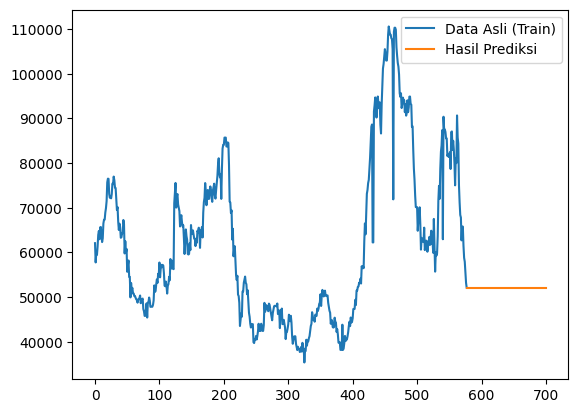

In [46]:
plt.plot(train_data['Harga'], label='Data Asli (Train)')
plt.plot(range(578, 578 + len(hasil_prediksi_inv_boxcox)), hasil_prediksi_inv_boxcox, label='Hasil Prediksi')
plt.legend()
plt.show()

In [47]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hitung MAPE
mape_value = calculate_mape(test_data['Harga'], hasil_prediksi_inv_boxcox[-1])
print(f'MAPE: {mape_value:.2f}%')

MAPE: 15.34%


# Peramalan

Peramalan (_forecasting_) terhadap data dilakukan hingga 7 periode ke depan.

In [48]:
from datetime import datetime, timedelta

data_diff.index = pd.to_datetime(data_diff.index)

pred = result_garch11_diff.forecast(horizon=7)
future_dates = [data_diff.index[-1] + timedelta(days=i) for i in range(1,8)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

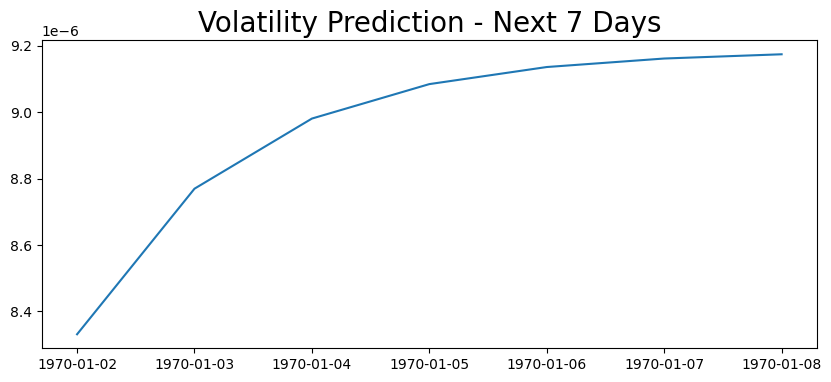

In [49]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [50]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 7)

In [51]:
predicted_forecast = condvar_forecast * epsilon_forecast - 5.7637e-08
predicted_forecast

,0
1970-01-02 00:00:00.000000699,0.000004
1970-01-03 00:00:00.000000699,-0.000001
1970-01-04 00:00:00.000000699,0.000006
1970-01-05 00:00:00.000000699,0.000014
1970-01-06 00:00:00.000000699,-0.000002
1970-01-07 00:00:00.000000699,-0.000002
1970-01-08 00:00:00.000000699,0.000014


Text(0.5, 1.0, 'Return Forecast - Next 7 Days')

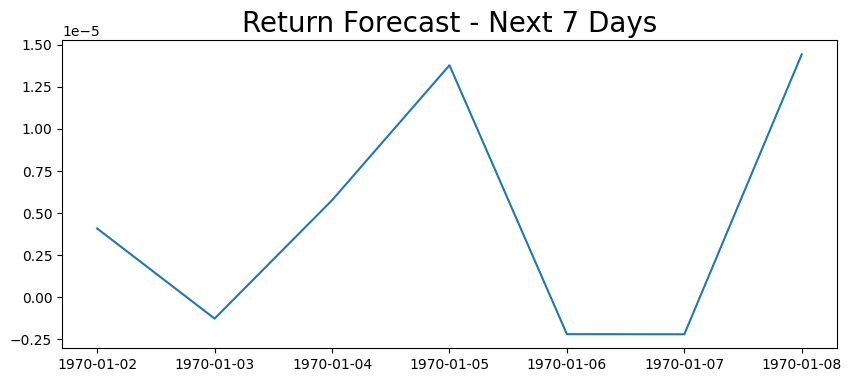

In [52]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 7 Days', fontsize=20)

In [55]:
predicted_test.to_excel("forecasted_return_7.xlsx", index=False)
files.download("forecasted_return_7.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
from datetime import datetime, timedelta

data_diff.index = pd.to_datetime(data_diff.index)

pred = result_garch11_diff.forecast(horizon=14)
future_dates = [data_diff.index[-1] + timedelta(days=i) for i in range(1,15)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 14 Days')

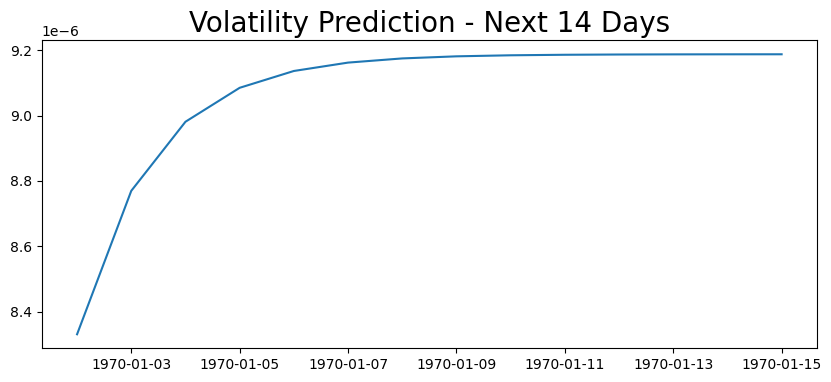

In [56]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 14 Days', fontsize=20)

In [57]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 14)

In [58]:
predicted_forecast = condvar_forecast * epsilon_forecast - 5.7637e-08
predicted_forecast

,0
1970-01-02 00:00:00.000000699,0.000004
1970-01-03 00:00:00.000000699,-0.000001
1970-01-04 00:00:00.000000699,0.000006
1970-01-05 00:00:00.000000699,0.000014
1970-01-06 00:00:00.000000699,-0.000002
1970-01-07 00:00:00.000000699,-0.000002
1970-01-08 00:00:00.000000699,0.000014
1970-01-09 00:00:00.000000699,0.000007
1970-01-10 00:00:00.000000699,-0.000004
1970-01-11 00:00:00.000000699,0.000005


Text(0.5, 1.0, 'Return Forecast - Next 14 Days')

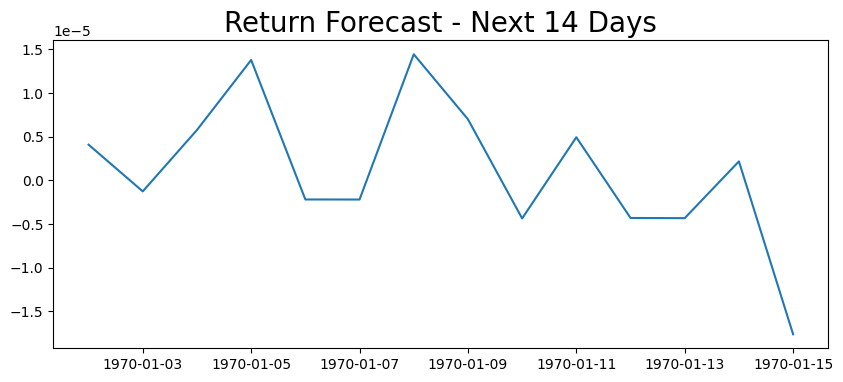

In [59]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 14 Days', fontsize=20)

In [60]:
predicted_test.to_excel("forecasted_return_14.xlsx", index=False)
files.download("forecasted_return_14.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
data_diff.index = pd.to_datetime(data_diff.index)

pred = result_garch11_diff.forecast(horizon=21)
future_dates = [data_diff.index[-1] + timedelta(days=i) for i in range(1,22)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 21 Days')

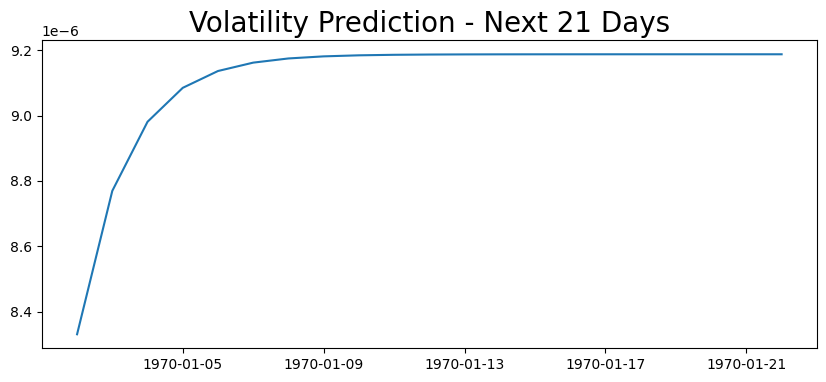

In [62]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 21 Days', fontsize=20)

In [63]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 21)

In [64]:
predicted_forecast = condvar_forecast * epsilon_forecast - 5.7637e-08
predicted_forecast

,0
1970-01-02 00:00:00.000000699,0.000004
1970-01-03 00:00:00.000000699,-0.000001
1970-01-04 00:00:00.000000699,0.000006
1970-01-05 00:00:00.000000699,0.000014
1970-01-06 00:00:00.000000699,-0.000002
1970-01-07 00:00:00.000000699,-0.000002
1970-01-08 00:00:00.000000699,0.000014
1970-01-09 00:00:00.000000699,0.000007
1970-01-10 00:00:00.000000699,-0.000004
1970-01-11 00:00:00.000000699,0.000005


Text(0.5, 1.0, 'Return Forecast - Next 21 Days')

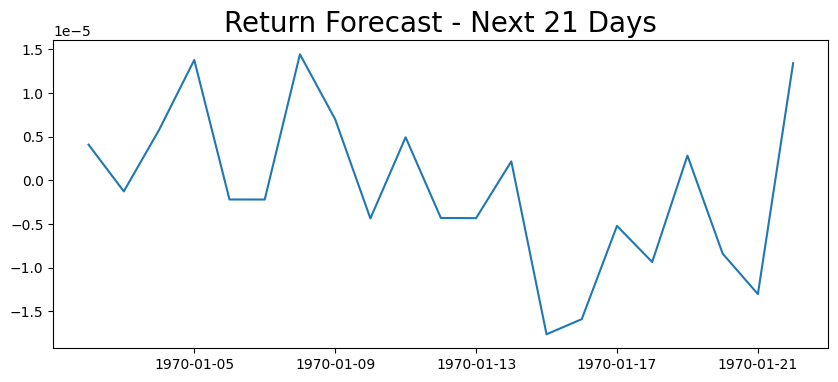

In [65]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 21 Days', fontsize=20)

In [66]:
predicted_test.to_excel("forecasted_return_21.xlsx", index=False)
files.download("forecasted_return_21.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [67]:
data_diff.index = pd.to_datetime(data_diff.index)

pred = result_garch11_diff.forecast(horizon=31)
future_dates = [data_diff.index[-1] + timedelta(days=i) for i in range(1,32)]
condvar_forecast = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 1 Month')

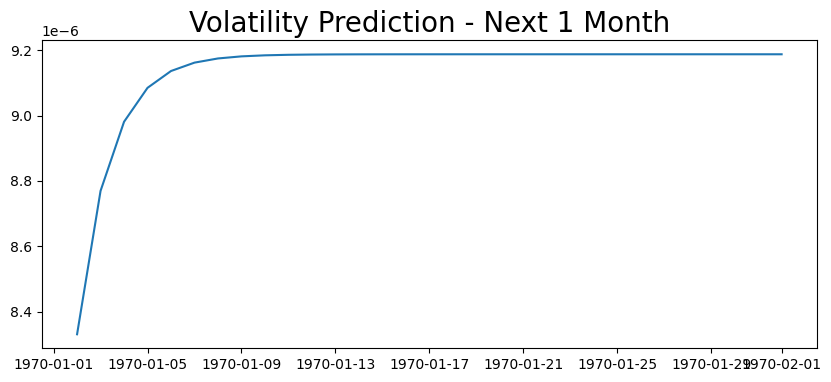

In [68]:
plt.figure(figsize=(10,4))
plt.plot(condvar_forecast)
plt.title('Volatility Prediction - Next 1 Month', fontsize=20)

In [69]:
np.random.seed(42)
epsilon_forecast = np.random.normal(0, 1, 31)

In [70]:
predicted_forecast = condvar_forecast * epsilon_forecast - 5.7637e-08
predicted_forecast

,0
1970-01-02 00:00:00.000000699,4.080334e-06
1970-01-03 00:00:00.000000699,-1.270160e-06
1970-01-04 00:00:00.000000699,5.759268e-06
1970-01-05 00:00:00.000000699,1.377891e-05
1970-01-06 00:00:00.000000699,-2.196950e-06
1970-01-07 00:00:00.000000699,-2.202802e-06
1970-01-08 00:00:00.000000699,1.443133e-05
1970-01-09 00:00:00.000000699,6.988327e-06
1970-01-10 00:00:00.000000699,-4.369470e-06
1970-01-11 00:00:00.000000699,4.926308e-06


Text(0.5, 1.0, 'Return Forecast - Next 1 Month')

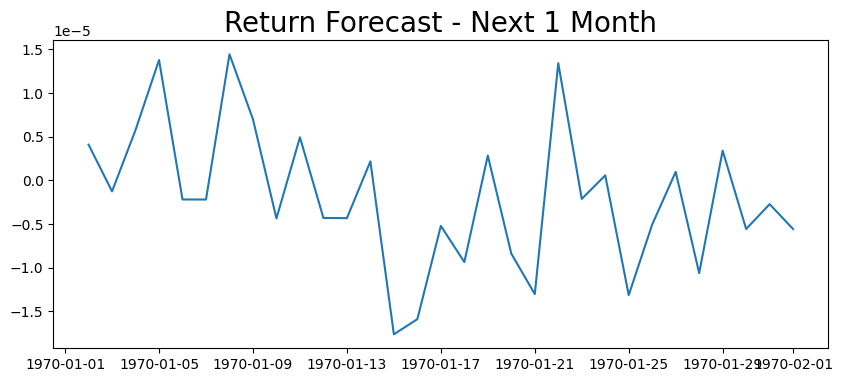

In [71]:
plt.figure(figsize=(10,4))
plt.plot(predicted_forecast)
plt.title('Return Forecast - Next 1 Month', fontsize=20)

In [72]:
predicted_test.to_excel("forecasted_return_1_month.xlsx", index=False)
files.download("forecasted_return_1_month.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>